## Implementation of Regularization

This is a short notebook, that shows how to implement regularization with the goal of optimazing the scope of the project, in a data science environment , that calls to using of the Linear Square Model. 

* Date: 2020-04-04
* Author: Si-ja
* Dataset: Wine Quality Data Set (Reference: http://archive.ics.uci.edu/ml/datasets/Wine+Quality)
* Additional resources to read that helped me get an idea what can be done:
    * https://towardsdatascience.com/the-complete-guide-to-resampling-methods-and-regularization-in-python-5037f4f8ae23
    * https://en.wikipedia.org/wiki/Regularization_(mathematics)
    * https://www.youtube.com/watch?v=hrzx3FTL9aQ&t

### Essence

In essence, to easily understand/explain Regularization - it is a process to control for overfitting in the machine learning tasks.

Overfitting happens when the model is tailored very well to the training data, but does not perform well with the testing data (or in general - real world one) that it has not been exposed to for the sake of training.

In this case - only two regressions will be evaluated: `Ridge regression` and `Lasso`. The reason is because they are both quite popularly used in the `Regression analytics`, which is the method that will be viewed here.

### Concepts: Ridge regression & LASSO

Linear regression that stands at the base of the said regularizations is a `Linear Regression`. Scikit learn page describes it in the following way: 

`LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.` (ref: https://scikit-learn.org/stable/modules/linear_model.html) 

The formula is the following:

$$
\begin{align}
    \min\limits_{w} ||X{w} - y||^2_2
\end{align}
$$

In simple terms: the formula says that the minimization of distance should happen through decreasing the size of `w` between the predicted value, which is calculated by multypling the known observation of a variable `X` times the weights that is attributed to the "importance" of that variable `w`. The `w` plays a role of decising how important the variable is to the underlying outcome of the regression. It is not per se correct to say that it determines importance, but rather weight of the contribution, as well as rate of change the independent variable to dependent, but thinking of this as importance gives a more solid idea further when talking about regularizations.

`Ridge` & `LASSO` effectivelly introduce just a new component to the previous equation and based on https://scikit-learn.org/stable/modules/linear_model.html page, take the following form:

$$
\begin{align}
LASSO\, (L1): \min\limits_{w} {1\over 2n_{samples}} ||X{w} - y||^2_2 + \alpha||w||_1
\end{align}
$$

$$
Ridge\, (L2): \min\limits_{w} ||X{w} - y||^2_2 + \alpha||w||^2_2
$$
 
Equivalently, what needs to be understood - is that in both scenarios - the most important component, is that there is a penalty variable added in the end of the equation. It is controled by the variable $\alpha$. Naturally, the bigger the $\alpha$ is - the bigger the penalty will be for the `w` variable, effectivelly forcing it to be smaller. But the smaller it is - the more we are trying to ensure - the model would not overfit. However - too big of an $\alpha$ will also lead to an underperforming model, with too small of weights, to be correct.

To this point - as I personally understand, they both have positive and negative trade offs. LASSO can set values of some coefficients to actually be zero, where Ridge would not do that. So depending on our priorities and goals (and additionally what we know about the data we are dealing with), we can chose one or the other. For instance: if we are sure we want to use particular variables in the model training - Ridge is the way to go. But if we are dealing with the data from the perspective of not being completelly sure what we want to retain that will determine how the model operates - Lasso might be a good solution. Naturally there are many other things to potentially consider, but so far to minimize the strain of information - this is enough.

### Diving into an example

It would be nice to actually see how all of this looks in practice, not just in theory. So let's approach this task. First we need a dataset, and it was decided (by me of course) to deal with a simple and known data - the wine data set. Let's load it. The source for it is taken from UCI Machine Learning website.

In [1]:
# Prior to getting the data - we will need few packages to operate with

# For numeric calculations and data transformations
import numpy as np
print("Numpy version: {}".format(np.__version__))

# For working with data structures and data frames
import pandas as pd
print("Pandas version: {}".format(pd.__version__))

# For visualization of the data
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
print("Seaborn version: {}".format(sns.__version__))
print("Matplotlib version: {}".format(matplotlib.__version__))

# For machine learning modeling processes (we will get more specific classes later)
import sklearn
print("Sklearn version: {}".format(sklearn.__version__))

# For few statistical operations
import scipy
from scipy.stats import shapiro
print("Scipy version: {}".format(sklearn.__version__))

Numpy version: 1.16.4
Pandas version: 0.25.0
Seaborn version: 0.9.0
Matplotlib version: 3.1.0
Sklearn version: 0.21.2
Scipy version: 0.21.2


In [2]:
# Load the data we need from a link
dataset_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Open the data
data = pd.read_csv(dataset_url)

# Preview the data
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


This is not right. As we can see, the issue seems to be that the seperator that is used is `;` instead of a regular comma. So we can fix that.

In [3]:
# Load the data we need from a link
dataset_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Open the data
data = pd.read_csv(dataset_url, sep = ";")

# Preview the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Now, as we have a quite nice dataset, it would be very beneficial to do 2 things before actually making a model that can predict something - and that is to explore the data and see if there are any missing values anywhere in it.

In [4]:
# Checking for missing information
print("There is missing data in the table: {}".format(data.isnull().values.any()))

There is missing data in the table: False


As it seems there is no missing data - that makes our lifes easier, also allowing not to search each column for those missing instances. Otherwise, that would be highly encouraged, to check if something is missing, drop thosre records and proceed. It's not really clear if interpolation here would work, as there is no time series aspect to it. Each record is unique.

Now then, we can learn a bit about the data itself. First pure statistical information would be beneficial.

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


For the major part `.describe()` method is enough for us to get some notion of understanding what we have on our hands. We see that all columns are filled and tehre are up to 4898 records. The mean quality of the wine, which we will use as our Dependent Variable is around 5.8 with a standard deviation of almost 1. Minimial values of it are 3, and maximum are 9. But the 75th percentale is equal to 6, which might suggest that our data is not from a normal distribution. Majority of other values do not convey too much useful of information in the form they are, as I don't know about you - but I'm not an expert on wine and its components.

Further, all the variables can be displayed in their spread in comparision to the quality variable + it is worth while to see how the values for the quality variable are distributed as well, as some notion of an issue has been noticed previously from the descriptive statistics.

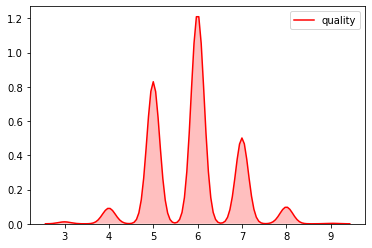

In [6]:
ax = sns.kdeplot(data["quality"], shade=True, color = "r")
plt.show(ax)

Simple kde plot seems to work finish, but not as smooth. Seems like quality values are purelly integers, therefore there is no transition between them. So better solution is to employ a bar chart.

In [7]:
# Find which quality values are representative of the whole quality set
quality_values = np.unique(data["quality"])
quality_values
# As was assumed - all of them are integers

# Find unique entries for each quality and convert it to a dataframe
quality_instances = pd.DataFrame(data.quality.value_counts()).sort_index()
quality_instances

,quality
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


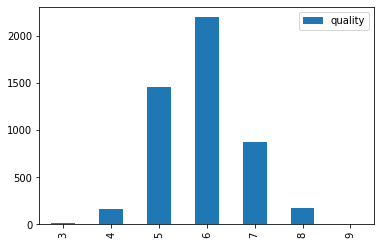

In [8]:
ax = quality_instances.plot.bar()
plt.show(ax)

What can be noticed, is that there is infact not many cases with values of 3 and 9 in quality. And quality of values 5 seems to be a lot more strong, than 7. The distribution seems to have a normal-ish type, though not fully. 

In [9]:
# Check with shapiro-wilk test if the distribution is normal
stat, p = shapiro(data)
print("Statistics = {}, p = {}".format(round(stat,3), round(p, 3)))

# Set a condition
check = 0.05
if p > check:
    print("Distribution is normal")
else:
    print("Distribution is not normal")

Statistics = 0.472, p = 0.0
Distribution is not normal


D:\Software\Anaconda\envs\PyTorch2019\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Even though likely the test is not too accurate (as it is not with too big of a sample set), even the statistical model suggests that the distribtuion is not normal.

But now let's move on to taking a look at the data we are dealing with and what the variables might tell us about their interaction with the `quality` variable.

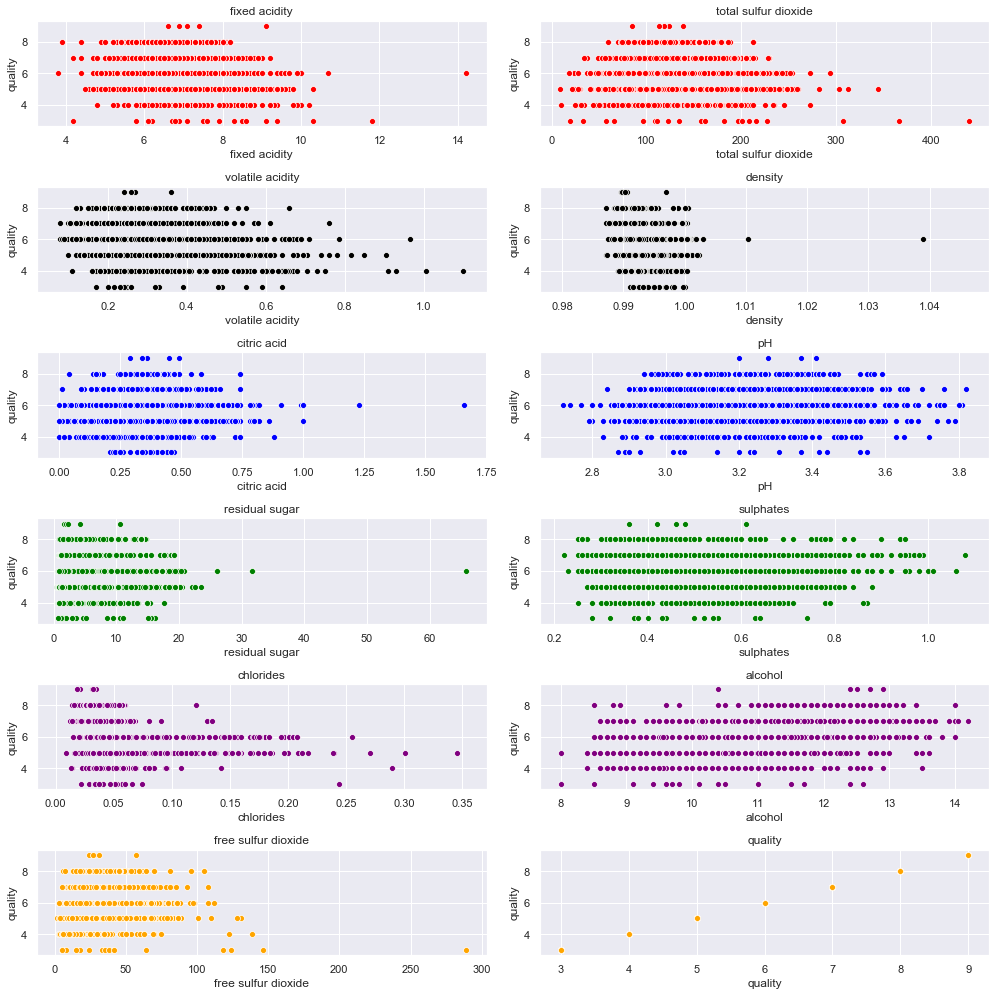

In [10]:
sns.set()
y = "quality"
rows = 6
columns = 2
colors = ["red", "black", "blue", "green", "purple", "orange"]
f, axes = plt.subplots(rows, columns, figsize=(14, 14), sharex=False)
for idx, columnName in enumerate(data.columns):
    row = idx % rows
    col = idx // rows
    c = colors[row]
    x = str(columnName)
    ax = sns.scatterplot(x = x, y = y, data=data, ax=axes[row, col], color = c)
    axes[row][col].set_title(x)
    plt.tight_layout()

Now we can get a small sense of what we are working with. Obviously increase/decrease in quality is directly related to increase/decrease in quality, so the last plot can be ignored. What can be noticed with interesting data, is that `Fixed acidity` seems to have some relationship with the quality, where it goes up - the quality seems to tend to go down. Similar concept seems to be a bit present with `Citric acid`, `Volatile acidity` and `Total sulfer dioxide`. On the oposite end, it could be seen that increase in `Sulphates` and `Alcohol` leads to increase in quality.

In general, it is not fully clear what might be the necessery variables be, that really influence the quality of (white) wine. Therefore, using something like a `Lasso` regularization might seem quite applicable. 

### Moving to Machine Learning concepts

Finally, let's produce a model will OLS regression and try to regulate for it and see how well our model will perform then.

In [11]:
# Devide the data into Dependend and Independent variables

# DV
y = data["quality"] 

# IV
X = data.drop(["quality"], axis = 1)

We can check if our data is kept properly and nothing broke.

In [12]:
pd.DataFrame(X.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [13]:
pd.DataFrame(y.head())

,quality
0,6
1,6
2,6
3,6
4,6


Now it would be beneficial to split our data into the training and testing sets. As well, as we know our data is not distributed properly - that we should stratify it. In this case we will use only one set of data, even though for other cases it might be beneficial to use something like k-fold cross validation for a more extensive model fitting.

In [14]:
from sklearn.model_selection import train_test_split 
# This method as described in documentation takes care of stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
# Now just a small update needs to be done to how data is stored so that sklearn could deal with it
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

Now lets load the classes for LinearRegression, regularizations and MSE (marginal squared error) calculations.

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

print("R^2 Score of Linear Regression: {}".format(round(lr.score(X_test, y_test), 4)))
print("MSE on a testing set: {}".format(round(mean_squared_error(y_test, lr.predict(X_test)), 4)))
print("-------------------------------------------------------------------------------------------")

# What if we applied Ridge regression using the exact same conditions
# Here we need a grid search as our alpha value is not known prior to us starting the endevour
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
alphaVals = {"alpha" : [1e-12,
                        1e-11,
                        1e-10,
                        1e-9,
                        1e-8,
                        1e-7,
                        1e-6,
                        1e-5,
                        1e-4,
                        1e-3,
                        1e-2,
                        1,
                        5,
                        10,
                        20,
                        30,
                        40]}
rr = GridSearchCV(estimator = ridge, param_grid = alphaVals, scoring = "r2", verbose = 1, cv = 10)
rr.fit(X_train, y_train)

#Refit with best parameter of alpha
ridge = Ridge(alpha = rr.best_params_["alpha"])
ridge.fit(X_train, y_train)


print("R^2 Score of Ridge Regression: {}".format(round(ridge.score(X_test, y_test), 4)))
print("MSE on a testing set: {}".format(round(mean_squared_error(y_test, ridge.predict(X_test)), 4)))
print("-------------------------------------------------------------------------------------------")

# Attempt the same for the lasso regularization
lasso = Lasso()
alphaVals = {"alpha" : [1e-12,
                        1e-11,
                        1e-10,
                        1e-9,
                        1e-8,
                        1e-7,
                        1e-6,
                        1e-5,
                        1e-4,
                        1e-3,
                        1e-2,
                        1,
                        5,
                        10,
                        20,
                        30,
                        40]}
lsr = GridSearchCV(estimator = lasso, param_grid = alphaVals, scoring = "r2", verbose = 1, cv = 10)
lsr.fit(X_train, y_train)

#Refit with best parameters of alpha
lasso = Lasso(alpha = lsr.best_params_["alpha"])
lasso.fit(X_train, y_train)

print("R^2 Score of Lasso: {}".format(round(lasso.score(X_test, y_test), 4)))
print("MSE on a testing set: {}".format(round(mean_squared_error(y_test, lasso.predict(X_test)), 4)))

R^2 Score of Linear Regression: 0.2659
MSE on a testing set: 0.5543
-------------------------------------------------------------------------------------------
Fitting 10 folds for each of 17 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R^2 Score of Ridge Regression: 0.2617
MSE on a testing set: 0.5575
-------------------------------------------------------------------------------------------
Fitting 10 folds for each of 17 candidates, totalling 170 fits
R^2 Score of Lasso: 0.2642
MSE on a testing set: 0.5556


[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    1.6s finished


The new models seem to not preidct much better than the original trained one. But, they are not substantially worse. The Lasso seems to perform quite well on the testing set. Hopes are, that models are simplified and less tailored to making mistakes, due to more significant overfitting.

We can always get coefficients and compare them.

In [17]:
lr_coef = lr.coef_[0]
rr_coef = ridge.coef_[0]
lsr_coef = lasso.coef_ # I know...this one is weird. Others are in list of lists, except for this one.

In [18]:
# Name of the variable
names = []
for idx, columnName in enumerate(data.columns):
    if idx != 11:
        names.append(columnName)

#New dataframe
data_coefs = {
    "Names" : names,
    "Linear Regression Coefficients": lr_coef,
    "Ridge Coefficients": rr_coef,
    "Lasso Coefficients": lsr_coef
}

df_coef = pd.DataFrame(data_coefs, columns = data_coefs.keys())

In [19]:
df_coef

,Names,Linear Regression Coefficients,Ridge Coefficients,Lasso Coefficients
0,fixed acidity,0.052278,0.005841,0.029884
1,volatile acidity,-1.928107,-1.975316,-1.949070
2,citric acid,-0.085351,-0.105327,-0.093367
3,residual sugar,0.074650,0.052301,0.063922
4,chlorides,0.287160,-0.004496,0.120322
5,free sulfur dioxide,0.004626,0.005056,0.004833
6,total sulfur dioxide,-0.000171,-0.000393,-0.000277
7,density,-131.163736,-72.200990,-102.920337
8,pH,0.646916,0.435881,0.545041
9,sulphates,0.691335,0.605433,0.649501


In majority of cases it can be noticed, that the coefficients of regularization applications are not too much different from the original model that was tried out. However, some of them still are smaller in some cases, and in some are a bit larger (smaller though being the slightly dominant trend). In the long run, if we tested information with more unseen data, it could be that regularized models could be more efficient in their accuracy. For now, this the methodology that was reviewd.